In [1]:
## Import needed packages
from sklearn.preprocessing.data import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import os
plt.style.use('seaborn-talk')

In [2]:
## Read the data
path = os.path.dirname(os.path.abspath(''))
file1 = path + "/data/creditcard_part1.csv"
file2 = path + "/data/creditcard_part2.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df  = pd.concat((df1, df2), ignore_index=True)

In [3]:
## Getting some info
print(f"Indices: {df.index}")
print(f"Header: {df.columns.values}\n")

print(df.info(),"\n")

pd.set_option("precision", 3)
print( f" {df.loc[:, ['Time', 'Amount']].describe()}\n" )

Indices: RangeIndex(start=0, stop=284807, step=1)
Header: ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float

Amount has an average credit card transaction around 88 dollars.

And the biggest transaction of 25691.160 dollarsssssss........

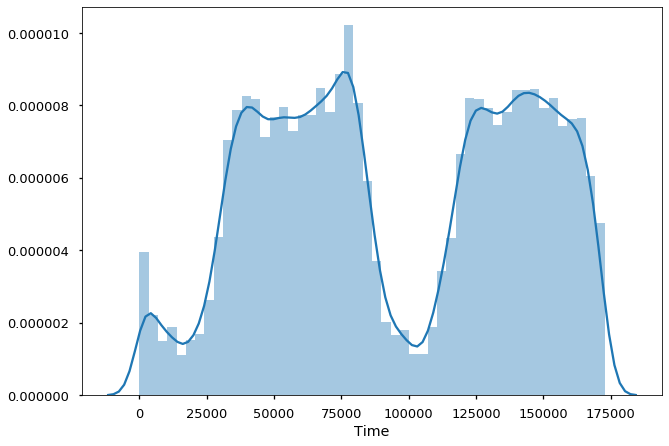

In [4]:
## Distribution of time
sb.distplot(df["Time"])
plt.show()

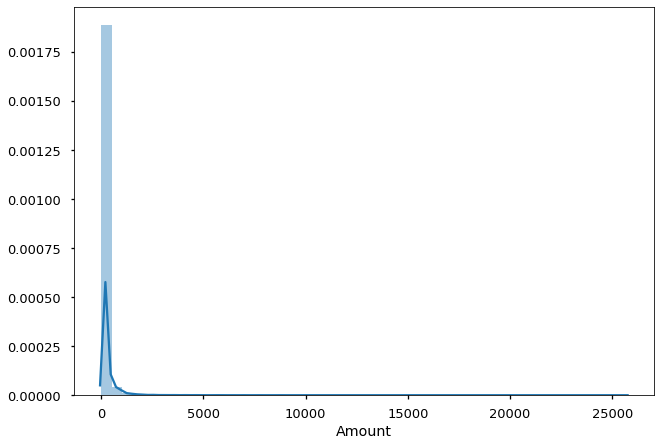

In [5]:
## Distribution of credit card transaction
sb.distplot(df["Amount"])
plt.show()

In [6]:
## Distrubution of the classes 'Non-fraudulent' and 'Fraudulent'
class_counts = df.Class.value_counts()
num_fraudulent = class_counts[1]
num_non_fraudulent = class_counts[0]
print(f"Fraudulent: {num_fraudulent}")
print(f"Non-Fraudulent: {num_non_fraudulent}")
print(f"Ratio: {(num_fraudulent/num_non_fraudulent)*100:.3f}%")

Fraudulent: 492
Non-Fraudulent: 284315
Ratio: 0.173%


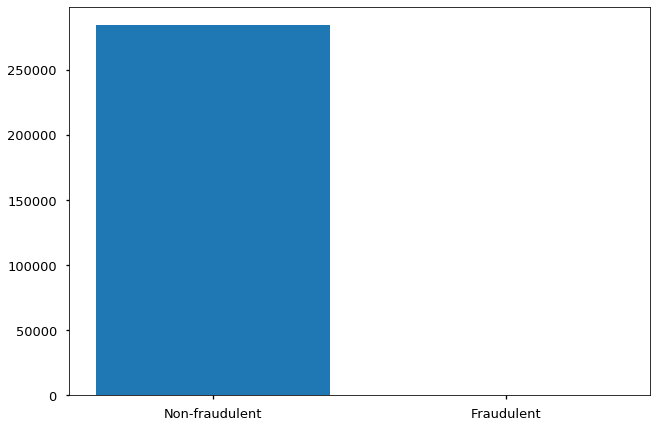

In [7]:
plt.bar(class_counts.index, [num_non_fraudulent, num_fraudulent])
plt.xticks(class_counts.index, ('Non-fraudulent','Fraudulent'))
plt.show()

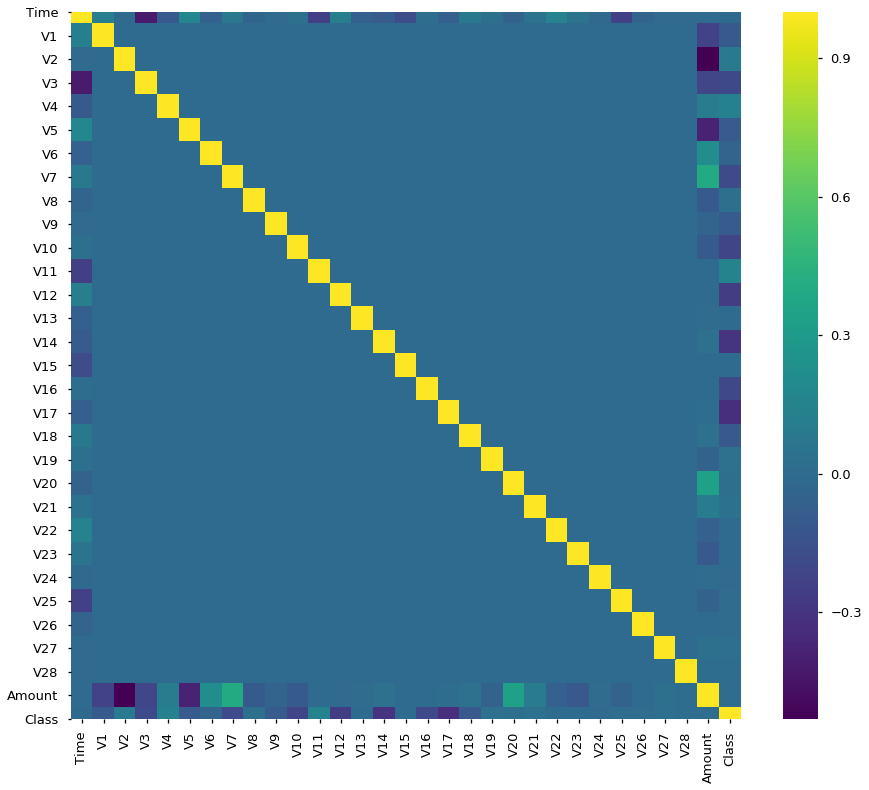

In [8]:
## Correlation heatmap
plt.figure(figsize=(15,13))
sb.heatmap( data=df.corr(), cmap="viridis")
plt.show()

V2 and Amount: -0.5314

V20 and Amount: 0.3394

V7 and Amount: 0.3973

V3 and Time: -0.420

In [9]:
### Undersampling
indices = np.arange(0, num_fraudulent)

frauds_df = df.loc[ df["Class"] == 1 ]
non_frauds_df = df.loc[ df["Class"] == 0 ]

ratio = 1

indices = np.arange(0, num_non_fraudulent)
indices = np.random.choice(indices, num_fraudulent, replace=False)

#non_frauds_df = non_frauds_df.loc[ indices ]
non_frauds_df = non_frauds_df.reindex( indices )

under_df  = pd.concat((frauds_df, non_frauds_df), ignore_index=True)
df = under_df.sample(frac=1).reset_index(drop=True)

display(df)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,77182.0,-1.411,2.268,-2.298,1.871,0.249,-1.209,-1.359,1.103,-1.317,...,0.155,-0.615,-0.196,-0.464,0.118,-0.485,0.374,0.188,1.00,1
1,139168.0,-0.452,1.001,-0.879,-0.300,1.150,0.112,0.612,0.336,0.043,...,0.357,1.385,-0.055,-1.097,-0.555,-0.080,0.026,-0.116,20.80,0
2,111609.0,-0.139,0.911,-0.801,-1.008,1.178,-1.725,1.753,-0.507,-0.407,...,0.265,0.898,-0.178,-0.058,-0.269,0.094,0.381,0.272,32.00,0
3,66190.0,1.191,-0.214,0.834,1.043,-0.584,0.584,-0.813,0.401,1.192,...,-0.066,-0.108,-0.043,-0.841,0.347,-0.309,0.070,0.020,1.18,0
4,41147.0,-5.314,4.146,-8.533,8.344,-5.718,-3.044,-10.989,3.404,-6.167,...,2.331,0.863,-0.614,0.524,-0.713,0.325,2.245,0.497,88.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,56887.0,-0.075,1.812,-2.567,4.128,-1.629,-0.806,-3.390,1.019,-2.451,...,0.794,0.270,-0.144,0.014,0.634,0.214,0.774,0.387,5.00,1
980,163984.0,2.111,-0.054,-1.350,0.252,0.211,-0.813,0.184,-0.303,0.558,...,-0.332,-0.810,0.252,-0.649,-0.199,0.238,-0.070,-0.066,1.98,0
981,8757.0,-1.864,3.443,-4.468,2.805,-2.118,-2.332,-4.261,1.702,-1.439,...,0.668,-0.516,-0.012,0.071,0.059,0.305,0.418,0.209,1.00,1
982,148146.0,1.894,-0.423,-0.936,0.436,-0.210,-0.365,-0.183,-0.040,0.560,...,0.031,0.090,0.131,-0.378,-0.231,0.227,-0.052,-0.058,59.95,0


In [10]:
## Getting the design matrix 'X' and the targets 'y'
# There are no attributes which are categorical in the dataset, so no need to do one-hot encoding.
X = df.loc[:, df.columns != 'Class'].values
y = df.loc[:, df.columns == 'Class'].values.ravel()

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (984, 30)
Shape of y: (984,)


In [11]:
## Scaling the parameters (Really just for Amount and Time)

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [12]:
### Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [13]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

logreg = LogisticRegression(random_state=4,
                            solver='lbfgs',
                            multi_class='multinomial',
                            max_iter=1000) 


from sklearn.model_selection import GridSearchCV
param_grid= {"C":np.logspace(-3,3,7), "penalty":["l2"]}
logreg_grid = GridSearchCV(logreg, param_grid, cv=5)
# logreg.fit(X_train, y_train)
logreg_grid.fit(X_train, y_train)

# prediction = logreg.predict(X_test)
prediction = logreg_grid.predict(X_test)

acc = accuracy_score(y_test, prediction)
print(f"Accuracy Score:  {acc:.4f}")
precision = precision_score(y_test, prediction)
print(f"Precision Score: {precision:.4f}. What percentage of the predicted frauds were frauds?" )
recall = recall_score(y_test, prediction)
print(f"Recall Score:    {recall:.4f}. What percentage of the actual frauds were predicted?")

Accuracy Score:  0.9392
Precision Score: 0.9664. What percentage of the predicted frauds were frauds?
Recall Score:    0.9172. What percentage of the actual frauds were predicted?


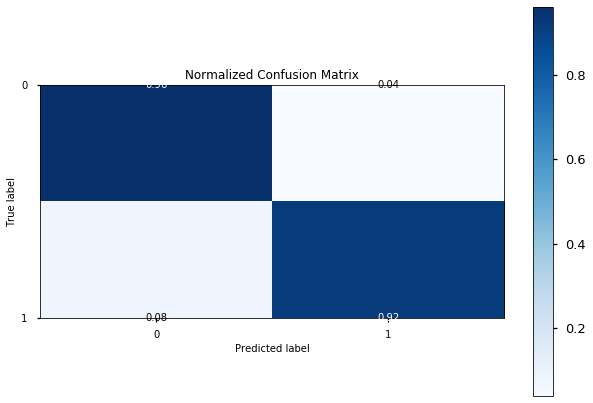

In [14]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)
plt.show()